# Load Library

In [30]:
!pip install ucimlrepo

In [31]:
import sys
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, f1_score

# Load Data

In [32]:
# Fetch dataset
ai4i_2020_predictive_maintenance_dataset = fetch_ucirepo(id=601)

# Extract data dan target
X = ai4i_2020_predictive_maintenance_dataset.data.features
y = ai4i_2020_predictive_maintenance_dataset.data.targets

# metadata
print(ai4i_2020_predictive_maintenance_dataset.metadata)

# variable information
print(ai4i_2020_predictive_maintenance_dataset.variables)

{'uci_id': 601, 'name': 'AI4I 2020 Predictive Maintenance Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/601/data.csv', 'abstract': 'The AI4I 2020 Predictive Maintenance Dataset is a synthetic dataset that reflects real predictive maintenance data encountered in industry.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression', 'Causal-Discovery'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 10000, 'num_features': 6, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], 'index_col': ['UID', 'Product ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5HS5C', 'creators': [], 'intro_paper': {'title': 'Explainable Artificial Intelligence for Predictive Maintenance

# EDA

In [33]:
# menggabungkan beberapa dataframe jadi satu dataframe tunggal
data = pd.concat([X, pd.DataFrame(y, columns=['Machine failure'])], axis=1)

# Data exploration
print(data.info())  # informasi  tentang dataset
print(data.describe())  # statistik deskriptif
print(data.head())  # lihat beberapa barus awal dataset
print(data.isnull().sum())  # cek missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   Air temperature      10000 non-null  float64
 2   Process temperature  10000 non-null  float64
 3   Rotational speed     10000 non-null  int64  
 4   Torque               10000 non-null  float64
 5   Tool wear            10000 non-null  int64  
 6   Machine failure      10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB
None
       Air temperature  Process temperature  Rotational speed        Torque  \
count     10000.000000         10000.000000      10000.000000  10000.000000   
mean        300.004930           310.005560       1538.776100     39.986910   
std           2.000259             1.483734        179.284096      9.968934   
min         295.300000           305.700000       1168.000

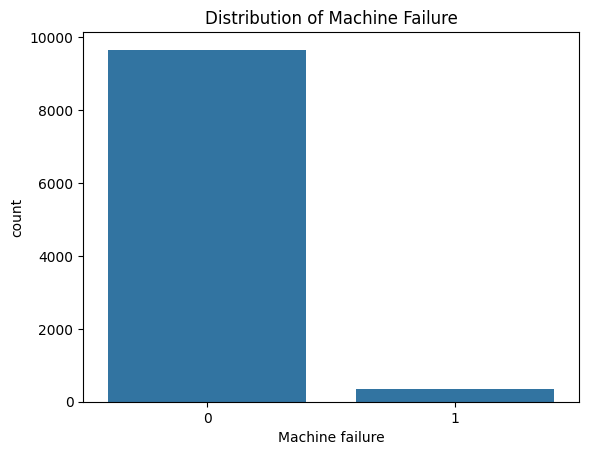

In [34]:
# Visualisasi distribusi target variable
sns.countplot(x='Machine failure', data=data)
plt.title('Distribution of Machine Failure')
plt.show()

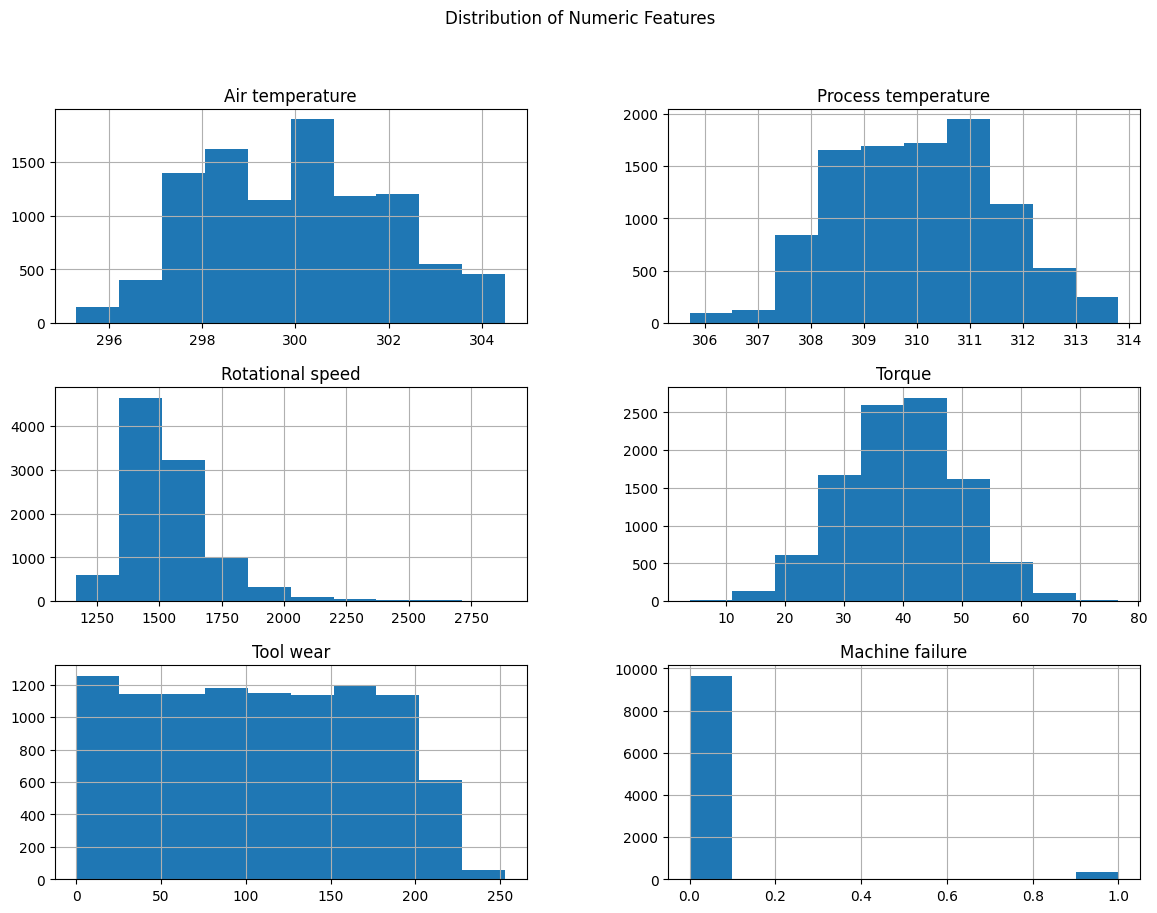

In [35]:
# Visualisasi fitur numerik
data.hist(figsize=(14, 10))
plt.suptitle('Distribution of Numeric Features')
plt.show()

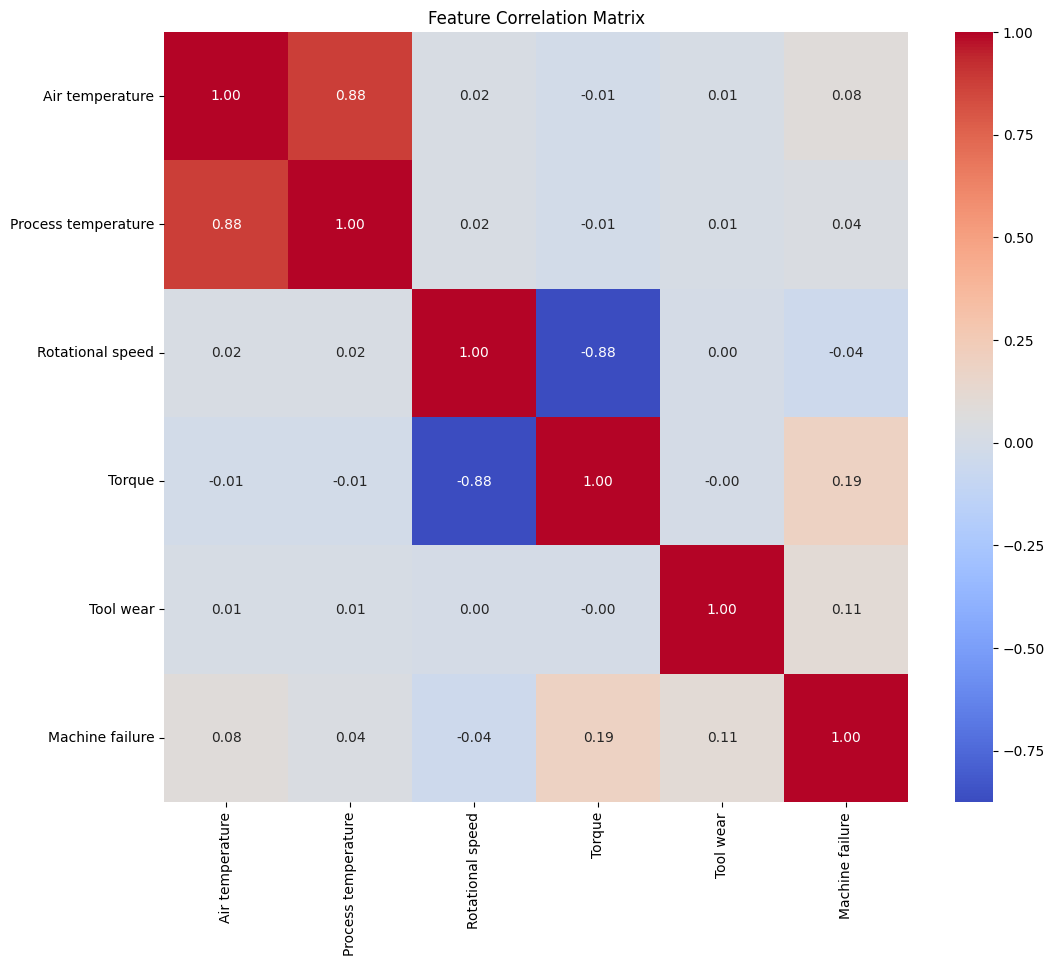

In [36]:
# Korelasi antara fitur
# Hapus kolom yang tidak bisa digunakan untuk korelasi
x = data.drop(['Type'], axis=1)

plt.figure(figsize=(12, 10))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# **Data Processing**

In [37]:
# Ubah fitur yang kategorikal menjadi numerik jika diperlukan
data_encoded = pd.get_dummies(data, drop_first=True)

In [38]:
# Pisahkan fitur dan target
X = data_encoded.drop('Machine failure', axis=1)
y = data_encoded['Machine failure']

In [39]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [40]:
# Standardisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Pemodelan dan Evaluasi Random Forest Classifier**

In [41]:
# Model Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Evaluasi Model Random Forest Classifier
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1932
           1       0.88      0.53      0.66        68

    accuracy                           0.98      2000
   macro avg       0.93      0.76      0.83      2000
weighted avg       0.98      0.98      0.98      2000



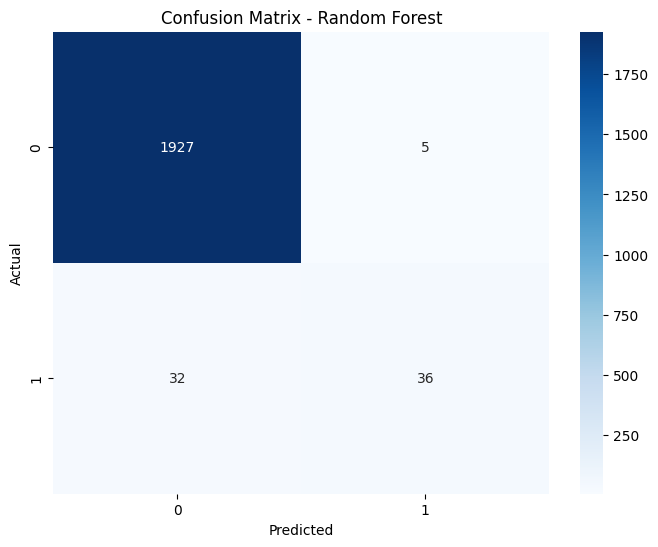

In [42]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# **Pemodelan dan Evaluasi Gradient Boosting Classifier**

In [43]:
# Model Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

# Evaluasi Model
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.88      0.68      0.77        68

    accuracy                           0.99      2000
   macro avg       0.94      0.84      0.88      2000
weighted avg       0.99      0.99      0.99      2000



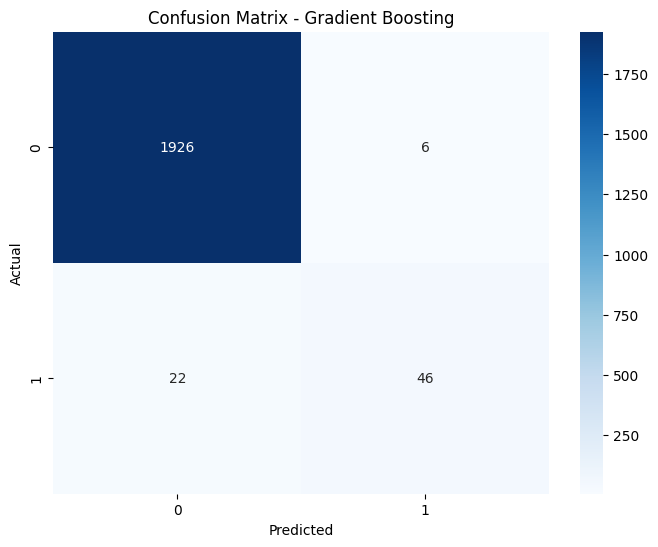

In [44]:
# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

# **Metrik Evaluasi Recall dan F1-Score**

In [45]:
# Evaluate models with recall and f1-score
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest - Recall: {recall_rf}, F1-Score: {f1_rf}")

recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
print(f"Gradient Boosting - Recall: {recall_gb}, F1-Score: {f1_gb}")

Random Forest - Recall: 0.5294117647058824, F1-Score: 0.6605504587155964
Gradient Boosting - Recall: 0.6764705882352942, F1-Score: 0.7666666666666666


# **Kesimpulan:**

Dalam kasus ini, model Gradient Boosting memiliki performa lebih baik dalam mendeteksi kegagalan mesin berdasarkan metrik recall dan memiliki performa lebih baik secara keseluruhan berdasarkan metrik F1-Score